Adapted from https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

In [25]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d grassknoted/asl-alphabet
! unzip asl-alphabet.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open asl-alphabet.zip, asl-alphabet.zip.zip or asl-alphabet.zip.ZIP.


In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.layers.normalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
image_size = [50,50] # Size to resize the image. Keep this low to save on memory (<=50)
data_proportion = .4 # Proportion of the total amount of data to use. Lower this if you run into problems with RAM
train_proportion = .7 # The proportion of the data assigned to train the model. 1 minus this value is the proportion for testing
batch_size = 64 # The number of inputs to run at once. Higher batch sizes will result in more accurate models with higher training times
epochs = 20 # The number of "generations" to train the CNN on. More epochs can result in a more accurate model but can also contribute to overfitting

In [17]:
class_names = np.asarray(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"])
# Loading up the training and testing data
train_X = []
train_Y = []
test_X = []
test_Y = []
for i in range(len(class_names)):
  cls = class_names[i]
  print("\rGetting class {}...".format(cls))
  dir_list = os.listdir("/content/asl_alphabet_train/asl_alphabet_train/"+cls)
  # Shuffling the directories to randomize training/testing data
  np.random.shuffle(dir_list)
  # Using all the data here takes up too much ram, so we drop some of the data
  dir_list = dir_list[0:int(len(dir_list)*data_proportion)]
  # Assining proportions to the training and testing data.
  train_list = dir_list[:int(len(dir_list)*(train_proportion))]
  test_list = dir_list[int(len(dir_list)*(train_proportion)):]
  for dir in train_list:
    if dir.endswith(".jpg"):
      # Append image
      train_X = train_X + [np.asarray(ImageOps.grayscale(Image.open("/content/asl_alphabet_train/asl_alphabet_train/{}/{}".format(cls,dir))).resize(image_size))]
      # Append label
      train_Y = train_Y + [i]
  for dir in test_list:
    if dir.endswith(".jpg"):
      # Append image
      test_X = test_X + [np.asarray(ImageOps.grayscale(Image.open("/content/asl_alphabet_train/asl_alphabet_train/{}/{}".format(cls,dir))).resize(image_size))]
      # Append label
      test_Y = test_Y + [i]

train_X = np.asarray(train_X)
train_Y = np.array(train_Y)
print(train_X.shape, train_Y.shape)
test_X = np.asarray(test_X)
test_Y = np.asarray(test_Y)
print(test_X.shape, test_Y.shape)

plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(class_names[train_Y[0]]))

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(class_names[test_Y[0]]))

Getting class A...


FileNotFoundError: ignored

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
test_X[0]
train_Y = np.array(train_Y)
train_Y

Total number of outputs :  29
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


array([ 0,  0,  0, ..., 28, 28, 28])

In [ ]:
# Reshaping the images so that we can use the convolution methods on them.
train_X = train_X.reshape(-1, image_size[0],image_size[1], 1)
test_X = test_X.reshape(-1, image_size[0],image_size[1], 1)
train_X.shape, test_X.shape


((20300, 50, 50, 1), (8700, 50, 50, 1))

In [ ]:
# Rescales the data to 0 to 1
train_X = train_X / 255.
test_X = test_X / 255.

In [16]:
# Change the labels from categorical to one-hot encoding
# This basically takes the current label and turns it into a array with the index of the class corresponding to the true value in the array
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

ValueError: ignored

In [15]:
# Partitioning the training data into internal testing data and training data. This is for the internal comparisons when training the CNN. The testing data from earlier in the code is used after the model has been trained.
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

NameError: ignored

In [14]:
num_classes = len(classes)

NameError: ignored

In [13]:
# Building the CNN

asl_model = Sequential()
asl_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(image_size[0],image_size[1],1)))
asl_model.add(LeakyReLU(alpha=0.1))
asl_model.add(MaxPooling2D((2, 2),padding='same'))
asl_model.add(Dropout(0.25))
asl_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
asl_model.add(LeakyReLU(alpha=0.1))
asl_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
asl_model.add(Dropout(0.25))
asl_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
asl_model.add(LeakyReLU(alpha=0.1))                  
asl_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
asl_model.add(Dropout(0.4))
asl_model.add(Flatten())
asl_model.add(Dense(128, activation='linear'))
asl_model.add(LeakyReLU(alpha=0.1))           
asl_model.add(Dropout(0.3))
asl_model.add(Dense(num_classes, activation='softmax'))

NameError: ignored

In [ ]:
asl_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
# Actually fitting the model to the data. This will take ~30 minutes depending on how you tweaked the earlier variables
asl_train = asl_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
254/254 [==============================] - 105s 411ms/step - loss: 2.7755 - accuracy: 0.1927 - val_loss: 1.6334 - val_accuracy: 0.5367
Epoch 2/20
254/254 [==============================] - 112s 443ms/step - loss: 1.3471 - accuracy: 0.5693 - val_loss: 0.7313 - val_accuracy: 0.8005
Epoch 3/20
254/254 [==============================] - 113s 443ms/step - loss: 0.8194 - accuracy: 0.7306 - val_loss: 0.4223 - val_accuracy: 0.8929
Epoch 4/20
254/254 [==============================] - 117s 460ms/step - loss: 0.5922 - accuracy: 0.8009 - val_loss: 0.2883 - val_accuracy: 0.9185
Epoch 5/20
254/254 [==============================] - 120s 473ms/step - loss: 0.4803 - accuracy: 0.8386 - val_loss: 0.2517 - val_accuracy: 0.9300
Epoch 6/20
254/254 [==============================] - 131s 516ms/step - loss: 0.3818 - accuracy: 0.8703 - val_loss: 0.1758 - val_accuracy: 0.9507
Epoch 7/20
254/254 [==============================] - 122s 479ms/step - loss: 0.3224 - accuracy: 0.8923 - val_loss: 0.1632 -

In [ ]:
test_eval = asl_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05583443120121956
Test accuracy: 0.9824137687683105


In [ ]:
print(asl_train.history)

{'loss': [2.7754526138305664, 1.347071647644043, 0.8193908333778381, 0.5922245979309082, 0.480289489030838, 0.3818400502204895, 0.3224266469478607, 0.27564728260040283, 0.2631362974643707, 0.23836210370063782, 0.21011826395988464, 0.19780264794826508, 0.19054873287677765, 0.17322784662246704, 0.1626911461353302, 0.15000563859939575, 0.1573312133550644, 0.14051289856433868, 0.13040542602539062, 0.12967750430107117], 'accuracy': [0.19267241656780243, 0.5693349838256836, 0.7306034564971924, 0.8008620738983154, 0.8386083841323853, 0.870258629322052, 0.892302930355072, 0.9087438583374023, 0.9085590839385986, 0.9185344576835632, 0.9309113025665283, 0.9352832436561584, 0.9370689392089844, 0.9424260854721069, 0.9477216601371765, 0.9481527209281921, 0.9458128213882446, 0.9514778256416321, 0.9573276042938232, 0.9575123190879822], 'val_loss': [1.6333544254302979, 0.7313004732131958, 0.4222673177719116, 0.28827419877052307, 0.2517244219779968, 0.17580820620059967, 0.16320714354515076, 0.1462309658

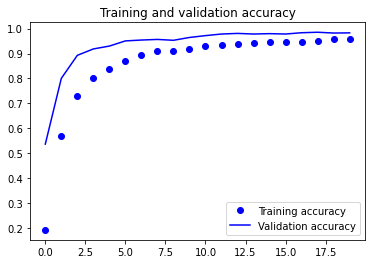

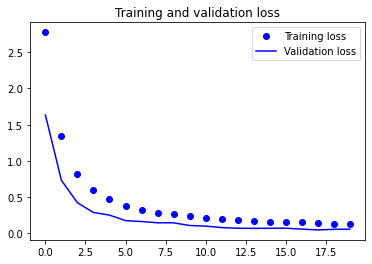

In [ ]:
accuracy = asl_train.history['accuracy']
val_accuracy = asl_train.history['val_accuracy']
loss = asl_train.history['loss']
val_loss = asl_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
asl_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [ ]:
predicted_classes = asl_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((8700,), (8700,))

Found 8530 correct labels


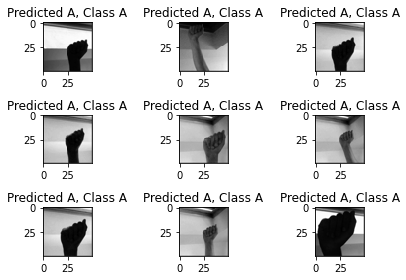

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(image_size[0],image_size[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_names[predicted_classes[correct]], class_names[test_Y[correct]]))
    plt.tight_layout()

Found 170 incorrect labels


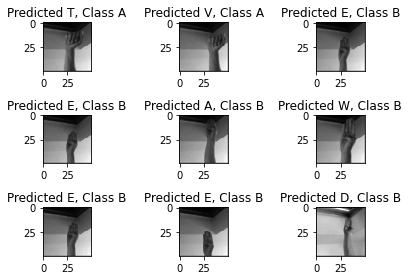

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(image_size[0],image_size[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_names[predicted_classes[incorrect]], class_names[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in class_names]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

               precision    recall  f1-score   support

      Class A       0.86      0.99      0.92       300
      Class B       0.99      0.97      0.98       300
      Class C       1.00      1.00      1.00       300
      Class D       0.98      1.00      0.99       300
      Class E       0.99      0.94      0.96       300
      Class F       1.00      1.00      1.00       300
      Class G       1.00      0.99      0.99       300
      Class H       0.99      0.99      0.99       300
      Class I       0.99      0.99      0.99       300
      Class J       0.99      1.00      1.00       300
      Class K       0.98      0.99      0.99       300
      Class L       1.00      1.00      1.00       300
      Class M       1.00      0.98      0.99       300
      Class N       0.98      1.00      0.99       300
      Class O       1.00      0.96      0.98       300
      Class P       1.00      1.00      1.00       300
      Class Q       1.00      1.00      1.00       300
      Cla